# Assignment 4: Sampling and Model Interpretability
-----------------------------------

**Dr. Dave Wanik - OPIM 5512: Data Science Using Python - University of Connecticut**

-----------------------------------


**Your Name Here:**

Put your sampling and interpretability skills to the test!

You will build a classification model using a sampling technique of your choice (oversampling, undersampling or SMOTE - I'm not testing how good your model is for this assignment, just that you know how to interpret the model!). We will use CA housing since you have some experience with this from tree-based models. You can use any classification model we have covered in class (DTC, RFC, GBC or logistic regression.)

# Rubric
* (10 points) Count values of each class before and after your sampling to confirm your understanding of how the sampling worked, and write a bullet of why your results make sense.

Then you will:
* (40 points) Print the top 3 features (using permutation importance with 15 repeats) in a box plot.
* (40 points) Create the partial dependence plots for the top 3 features (you may opt to use the num_grid_points argument). Customize the plots so that the Y axis is consistent on each of the five plots and remember that the Y axis is showing the change in predicted probability.
* (10 points) Write five meaningful bullets about what you see in the plots and tables. Does anything surprise you?
  * **Optional:** Potential with issues concerning correlated predictors (read here for a cool way on how to address this: https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance_multicollinear.html)?

In [1]:
# import modules we need for EDA and wrangling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# these functions are useful for splitting and normalization
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split

# import other functions we'll need for classification  modeling
from sklearn.ensemble import RandomForestClassifier #RFC

# regression error metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# permutation testing
from sklearn.inspection import permutation_importance

In [2]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


And we will recode the target variable to a classification problem.

In [3]:
# by using 75th percentile, we will have nice imbalanced data!
df['median_house_value'] = np.where(df['median_house_value'] > np.percentile(df['median_house_value'], q=75), 1, 0)
df['median_house_value'].value_counts()

0    12753
1     4247
Name: median_house_value, dtype: int64

In [4]:
# grab all of the 0s
Zero_df = df[df['median_house_value']==0]
print(Zero_df.shape)

(12753, 9)


In [5]:
# grab all of the 1s
One_df = df[df['median_house_value']==1]
print(One_df.shape)

(4247, 9)


In [6]:
Zero_subset_df = Zero_df.sample(n=One_df.shape[0], replace=False)
print(Zero_subset_df.shape)

(4247, 9)


In [7]:
balanced_df = One_df.append(Zero_subset_df)
print(balanced_df.shape)

(8494, 9)


<ipython-input-7-e28c89083f99>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_df = One_df.append(Zero_subset_df)


In [8]:
4247*2

8494

In [9]:
# don't forget to split into train/test!
y = balanced_df['median_house_value']
X = balanced_df.drop('median_house_value', axis=1)
print(X.shape, y.shape)

(8494, 8) (8494,)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 42)

# Sampling

In [11]:
# add your sampling code here
# SMOTE, over, under... choose one!


# Random Undersampling

In [12]:
# example of random oversampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

In [13]:
# define oversampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_under))

Counter({0: 4247, 1: 4247})


In [14]:
X_under

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-117.63,34.37,20.0,7052.0,1306.0,2197.0,810.0,3.7252
1,-118.30,33.93,36.0,2196.0,633.0,2017.0,583.0,1.3962
2,-118.26,34.13,37.0,1383.0,470.0,1185.0,451.0,2.5000
3,-122.25,38.03,15.0,3338.0,532.0,1834.0,520.0,5.6293
4,-121.80,37.34,25.0,1642.0,297.0,1146.0,279.0,5.2088
...,...,...,...,...,...,...,...,...
8489,-122.94,38.57,33.0,1530.0,266.0,728.0,250.0,5.1005
8490,-123.00,38.33,8.0,3223.0,637.0,851.0,418.0,5.6445
8491,-123.02,38.36,16.0,1496.0,298.0,778.0,284.0,3.8589
8492,-123.49,38.70,9.0,5409.0,1019.0,594.0,327.0,3.3125


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [16]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8494 entries, 172 to 6389
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           8494 non-null   float64
 1   latitude            8494 non-null   float64
 2   housing_median_age  8494 non-null   float64
 3   total_rooms         8494 non-null   float64
 4   total_bedrooms      8494 non-null   float64
 5   population          8494 non-null   float64
 6   households          8494 non-null   float64
 7   median_income       8494 non-null   float64
 8   median_house_value  8494 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 663.6 KB


In [17]:
balanced_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000
mean,-119.658169,35.561976,29.277843,2775.861785,544.520132,1394.006004,507.655639,4.493282,0.500000
std,2.007543,2.063267,12.856362,2287.472180,425.112080,1184.679924,390.609645,2.240880,0.500029
min,-124.220000,32.540000,1.000000,8.000000,1.000000,3.000000,1.000000,0.499900,0.000000
25%,-121.950000,33.930000,19.000000,1547.250000,300.000000,775.000000,284.000000,2.915725,0.000000
50%,-118.500000,34.220000,29.000000,2237.000000,438.000000,1139.000000,413.000000,4.062500,0.500000
75%,-118.070000,37.640000,38.000000,3292.000000,656.000000,1668.750000,611.000000,5.624925,1.000000
max,-114.470000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,1.000000


In [18]:
# check your work - does the shape match what you think it should be?
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6795, 8) (1699, 8) (6795,) (1699,)


In [19]:
# convert these all to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

##Min Max Scaler

In [20]:
# you probably have already imported the MinMaxScale at the top of your script
# you should convert to numpy array before scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# if you wanted to run summary stats on these to check the range,
# you would need to convert to a pandas dataframe.
tmp = pd.DataFrame(X_train)
tmp.describe() # notice how all the max values are 1, all min values are 0.

,0,1,2,3,4,5,6,7
count,6795.000000,6795.000000,6795.000000,6795.000000,6795.000000,6795.000000,6795.000000,6795.000000
mean,0.467955,0.320688,0.556788,0.072740,0.084098,0.039025,0.083076,0.274566
std,0.205526,0.218435,0.251994,0.060227,0.066551,0.033957,0.064782,0.154893
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.233846,0.147715,0.352941,0.040526,0.046104,0.021665,0.046389,0.164815
50%,0.586667,0.179596,0.568627,0.058799,0.067526,0.031867,0.067610,0.244645
75%,0.630769,0.541977,0.725490,0.085970,0.101211,0.046526,0.100099,0.351916
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model and Metrics

In [22]:
# use any model you want - fit on train, predict on test!
# you should print confusion matrix and classification report
#  for train and test partitions
# make a variable to store the general model
# you can accept all of the defaults...
RFC = RandomForestClassifier()
# or start to 'tinker' :) this is called hyperparameter tuning

# fit the model - one line of code
RFC = RFC.fit(X_train, y_train)

In [23]:
# store the predictions
train_preds_RFC = RFC.predict(X_train)
test_preds_RFC = RFC.predict(X_test)

In [24]:
# 1) R2 value - for Random Forest Regression
print("This is train R2 (RFC):", r2_score(y_train, train_preds_RFC)) # train
print("This is test R2 (RFC):", r2_score(y_test, test_preds_RFC)) # test

This is train R2 (RFC): 1.0
This is test R2 (RFC): 0.4561504884639368


In [25]:
# 2) mae - for RF Regression
trainMAE_RFC = mean_absolute_error(y_train, train_preds_RFC)
print("This is trainMAE (RFC):", trainMAE_RFC) # train
testMAE_RFC = mean_absolute_error(y_test, test_preds_RFC)
print("This is testMAE (RFC):", testMAE_RFC) # test

This is trainMAE (RFC): 0.0
This is testMAE (RFC): 0.13596233078281342


In [26]:
# 3) mse
trainMSE_RFC = mean_squared_error(y_train, train_preds_RFC)
print("This is trainMSE (RFC):", trainMSE_RFC)
testMSE_RFC = mean_squared_error(y_test, test_preds_RFC)
print("This is testMSE (RFC):", testMSE_RFC)

This is trainMSE (RFC): 0.0
This is testMSE (RFC): 0.13596233078281342


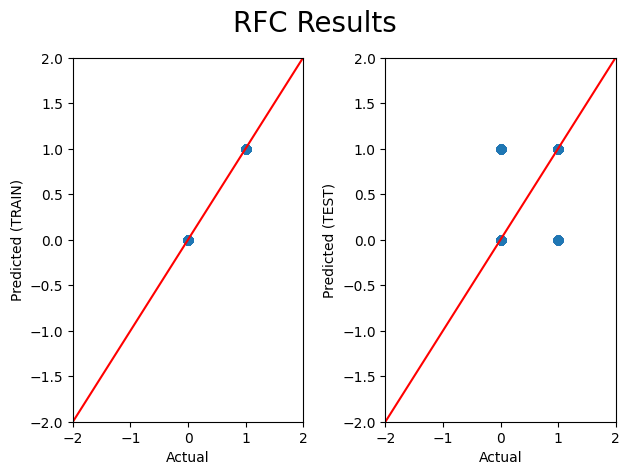

In [27]:
# specify the dimensions
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# fig limits


# add a main title across top
fig.suptitle("RFC Results", fontsize=20)

# this makes the individual subplots
axes[0].scatter(x=y_train, y=train_preds_RFC) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted (TRAIN)",  fontsize=10)
# set plot limits
axes[0].set_xlim(-2,2)
axes[0].set_ylim(-2,2)
# add 45 degree line to left panel
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')


axes[1].scatter(x=y_test, y=test_preds_RFC) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted (TEST)",  fontsize=10)
# set plot limits
axes[1].set_xlim(-2,2)
axes[1].set_ylim(-2,2)
# add 45 degree line to right panel
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# scooch it down
# link: https://stackoverflow.com/questions/7066121/how-to-set-a-single-main-title-above-all-the-subplots-with-pyplot
fig.subplots_adjust(top=0.88)

# show the plot
plt.show()

# Interpretability

In [28]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# to get rid of annoying future warnings...

In [29]:
!pip install pulp # for partial dependence plots!
!pip install pycebox
from pycebox.ice import ice, ice_plot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 22.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pycebox: filename=pycebox-0.0.1-py3-none-any.whl size=3625 sha256=bdaddd20071585c165523610ed25e0442de96099ad56eff850c6d5240757f167
  Stored in directory: /root/.cache/pip/wheels/af/57/4b/0d7bdd5b5ee35d225b01da15c62ed0ec0af10073f24a4a03ce
Successfully built pycebox


## Permutation Importance

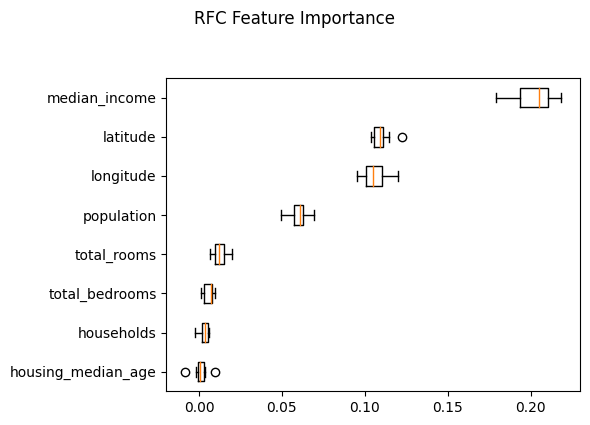

In [30]:
# permutation importance is on X_test
from sklearn.inspection import permutation_importance

# let's make this repeatable! all you need to do is assign
# a model object to clf!

clf = RFC # just update the title!

result = permutation_importance(clf, X_test, y_test, n_repeats=15,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))
ax1.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X.columns[perm_sorted_idx])
fig.suptitle('RFC Feature Importance', y=1.05)
fig.tight_layout()
plt.show()

## Partial Dependence

In [31]:
# pcyebox likes the data to be in a DataFrame so let's create one with our imputed data
# we first need to impute the missing data
train_X_df = pd.DataFrame(X_train, columns=X.columns)
train_X_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0.193846,0.574920,0.862745,0.041502,0.050605,0.027411,0.060865,0.174577
1,0.592821,0.182784,0.647059,0.028767,0.032443,0.026514,0.034381,0.246845
2,0.656410,0.160468,0.392157,0.105996,0.142813,0.071611,0.136700,0.183735
3,0.232821,0.511158,0.921569,0.032563,0.045172,0.019451,0.046225,0.214611
4,0.623590,0.129649,1.000000,0.070295,0.099193,0.031980,0.102155,0.268203


In [32]:
train_X_df.shape

(6795, 8)

###median_income

In [33]:
train_X_df['median_income'].nunique()

5561

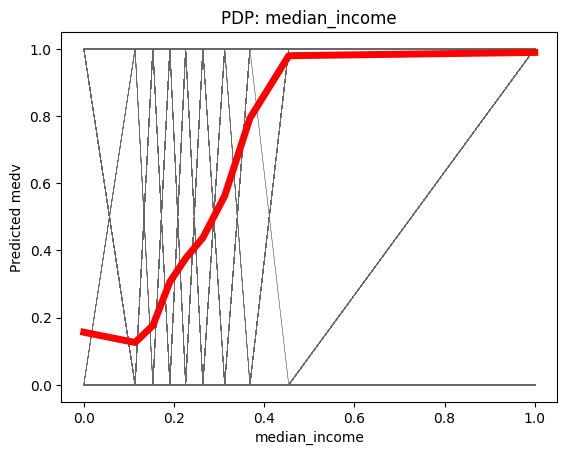

In [34]:
tmpdf = ice(data=train_X_df, column='median_income',
                   predict=RFC.predict,
            num_grid_points=10)

ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.title('PDP: median_income')
plt.ylabel('Predicted medv')
plt.xlabel('median_income');
plt.show()

###longitude

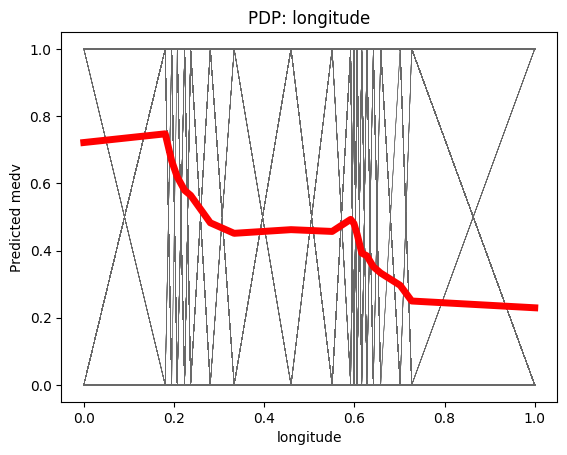

In [35]:
tmpdf = ice(data=train_X_df, column='longitude',
                   predict=RFC.predict,
            num_grid_points=20)

ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.title('PDP: longitude')
plt.ylabel('Predicted medv')
plt.xlabel('longitude');
plt.show()

###latitude

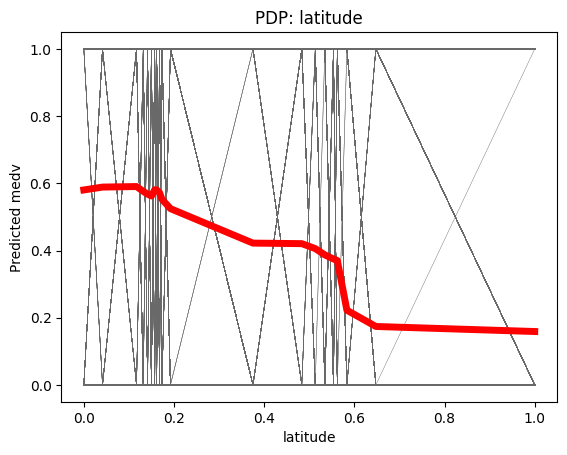

In [36]:
tmpdf = ice(data=train_X_df, column='latitude',
                   predict=RFC.predict,
            num_grid_points=20)

ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.title('PDP: latitude')
plt.ylabel('Predicted medv')
plt.xlabel('latitude');
plt.show()

###population

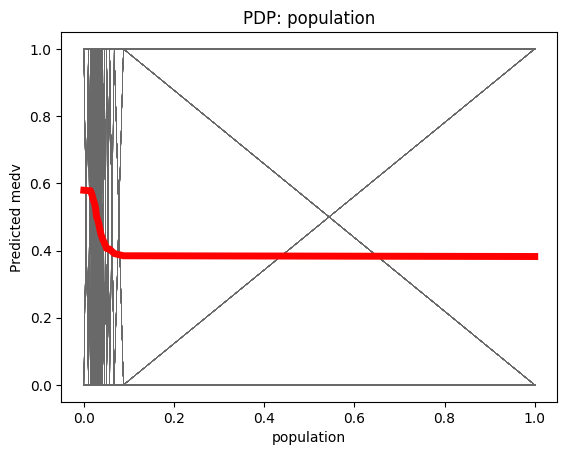

In [37]:
tmpdf = ice(data=train_X_df, column='population',
                   predict=RFC.predict,
            num_grid_points=20)

ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.title('PDP: population')
plt.ylabel('Predicted medv')
plt.xlabel('population');
plt.show()

In [38]:
def plot_ice_grid(dict_of_ice_dfs, data_df, features, ax_ylabel='', nrows=4,
                  ncols=4, figsize=(12, 12), sharex=False, sharey=True,
                  num_grid_points = 10, # DW added this on 4/27/2022!
                  subplots_kws={}, rug_kws={'color':'k'}, **ice_plot_kws):
    """A function that plots ICE plots for different features in a grid."""
    fig, axes = plt.subplots(nrows=nrows,
                             ncols=ncols,
                             figsize=figsize,
                             sharex=sharex,
                             sharey=sharey,
                             **subplots_kws)
    # for each feature plot the ice curves and add a rug at the bottom of the
    # subplot
    for f, ax in zip(features, axes.flatten()):
        ice_plot(dict_of_ice_dfs[f], ax=ax, **ice_plot_kws)
        # add the rug
        sns.distplot(data_df[f], ax=ax, hist=False, kde=False,
                     rug=True, rug_kws=rug_kws)
        ax.set_title('feature = ' + f)
        ax.set_ylabel(ax_ylabel)
        sns.despine()

    # get rid of blank plots
    for i in range(len(features), nrows*ncols):
        axes.flatten()[i].axis('off')

    return fig

In [39]:
train_X_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0.193846,0.574920,0.862745,0.041502,0.050605,0.027411,0.060865,0.174577
1,0.592821,0.182784,0.647059,0.028767,0.032443,0.026514,0.034381,0.246845
2,0.656410,0.160468,0.392157,0.105996,0.142813,0.071611,0.136700,0.183735
3,0.232821,0.511158,0.921569,0.032563,0.045172,0.019451,0.046225,0.214611
4,0.623590,0.129649,1.000000,0.070295,0.099193,0.031980,0.102155,0.268203


In [ ]:
# columns to plot
features = train_X_df.columns

# create dict of ICE data for grid of ICE plots
train_ice_dfs = {feat: ice(data=train_X_df, column=feat, predict=RFC.predict)
                 for feat in features}

plot_ice_grid(train_ice_dfs, train_X_df, features,
                    ax_ylabel='Pred medv', alpha=0.3, plot_pdp=True,
                    pdp_kwargs={'c': 'red', 'linewidth': 3},
                    linewidth=0.5, c='dimgray')
plt.ylim([0,50])
plt.suptitle('ICE plots (training data): RFC model')
plt.subplots_adjust(top=0.89)
plt.tight_layout()

# Conclusions

1. Median income, latitude, longitude and population were the 3 important features that contributed the maximum in deciding the median value of the house.

2. Median house value of the house is greater than 75 percentile(i.e. 1) for median income is greater that 0.4.

3. As the longitude of the house increases its median value decreases.This means houses in western part of California are higher in price comparatively. The more closer the house is to west coast of california the higher its prices. Technically the median value is 0.75 for latitude 0-0.2, between 0.4-0.6 for latitude between 0.2-0.6 and 0.2 for latitude > than 0.6

4. The closer to the equator a house is the higher is its prices. Technically the median value is 0.75 for latitude 0-0.2, between 0.4-0.6 for latitude between 0.2-0.6 and 0.2 for latitude > than 0.6.

5. Median house value of the house is 0.4 for any value of the population. Thw stagnant nature of the ice plot for any value of populaiton makes me wonder if it is really one of the determinants. (May be I am interpreting it wrong!!)

In [ ]:
# good luck!